## Imports

In [166]:
import argparse
import xarray as xr 
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import os 
import copy
from scipy import signal
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta


import matplotlib.pyplot as plt
import matplotlib as mpl
#import collections
import matplotlib.ticker as mticker
from matplotlib import ticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.crs as ccrs
import cartopy as cart
import cartopy.mpl.ticker as cticker
import cartopy.feature as cfeature
from matplotlib.colors import ListedColormap
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cmocean
import scipy as sp
import warnings
warnings.filterwarnings("ignore")
import os
import glob
import pickle

## Grab NPZ files:

In [210]:
def open_filly(dir,fn):
    file_path_out = os.path.join(dir, fn)
    groomby = np.load(file_path_out, allow_pickle=True)
    try:
        return groomby['svo'],groomby['lat'],groomby['lon'],groomby['svod']
    except:
        return groomby['svo'],groomby['lat'],groomby['lon']

dir_cntrl = '/glade/derecho/scratch/wchapman/ADF/f.e.FTORCHmjo_CNTRLmjo_tot/ts/climo/mjo_diag/' 
f_cntrl = 'f.e.FTORCHmjo_CNTRLmjo_tot.cam.h1.MJO_COMPOSITE_EOFS_LHFLX_V850_U850.npz'
DS_cntrl = open_filly(dir_cntrl, f_cntrl)

dir_mean = '/glade/derecho/scratch/wchapman/ADF/f.e.FTORCHmjo_MEANmjo_tot/ts/climo/mjo_diag/' 
f_mean = 'f.e.FTORCHmjo_MEANmjo_tot.cam.h1.MJO_COMPOSITE_EOFS_LHFLX_V850_U850.npz'
DS_mean = open_filly(dir_mean, f_mean)

dir_fullcnn = '/glade/derecho/scratch/wchapman/ADF/f.e.FTORCHmjo_fullCNN/ts/climo/mjo_diag/' 
f_fullcnn = 'f.e.FTORCHmjo_fullCNN.cam.h1.MJO_COMPOSITE_EOFS_LHFLX_V850_U850.npz'
DS_fullcnn = open_filly(dir_fullcnn, f_fullcnn)

dir_mjocnn = '/glade/derecho/scratch/wchapman/ADF/f.e.FTORCHmjo_CNNmjo_tot/ts/climo/mjo_diag/' 
f_mjocnn = 'f.e.FTORCHmjo_CNNmjo_tot.cam.h1.MJO_COMPOSITE_EOFS_LHFLX_V850_U850.npz'
DS_mjocnn = open_filly(dir_mjocnn, f_mjocnn)

dir_ERA5 = '/glade/derecho/scratch/wchapman/ADF/ERA5_data/ts/climo/mjo_diag/' 
f_ERA5 = 'ERA5.h1.MJO_COMPOSITE_EOFS_lhflx_V850_U850.npz'
DS_ERA5 = open_filly(dir_ERA5, f_ERA5)

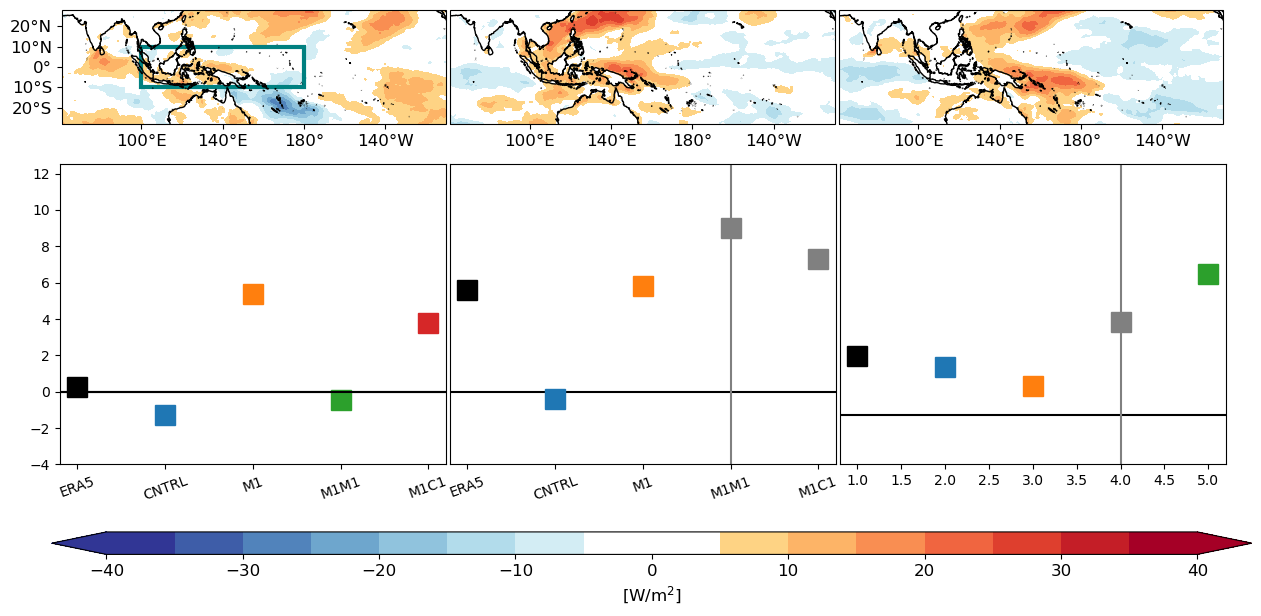

In [213]:
# Setup remains largely the same
# Define clevs and colormap for your data here
# Parameters and data setup (remains the same)

from matplotlib.patches import Rectangle


clevs = np.arange(-40, 45, 5)
bluey = mpl.cm.get_cmap('RdYlBu_r', len(clevs))
newcolors = bluey(np.linspace(0, 1, len(clevs)))
nnn = int(np.floor(newcolors.shape[0]/2))
newcolors[nnn] = newcolors[nnn]/newcolors[nnn]
newcolors[nnn+1] = newcolors[nnn+1]/newcolors[nnn+1]
newcolors[nnn-1] = newcolors[nnn-1]/newcolors[nnn-1]
cmapzzz = ListedColormap(newcolors)
cbar_lab ='[W/m$^2$]'
pf_scale = 1


lean_in = DS_ERA5


#begin fig
fig = plt.figure(figsize=(20, 15))  # Adjusted figure size for 8 panels
proj = ccrs.PlateCarree(central_longitude=180)

for phs in range(4,7):    
    ax = plt.subplot(1, 4, phs-3, projection=proj)  # Dynamic subplot creation
    ax.coastlines('50m')

    v = lean_in[0][phs,1,:,:]
    u = lean_in[0][phs,0,:,:]
    pfield = lean_in[0][phs,2,:,:]
    pfield = pfield*pf_scale 
    # Apply the mask: Replace vectors with small magnitudes with NaNs
    mask = np.sqrt(u**2 + v**2) < .5
    u = np.where(mask, np.nan, u)
    v = np.where(mask, np.nan, v)

    lon, lat = lean_in[2], lean_in[1]

    # Subsampling for quiver plot clarity
    skip = (slice(None, None, 7), slice(None, None, 7))
    
    # Plotting
    bb = ax.contourf(lon - 180, lat, pfield, levels=clevs, cmap=cmapzzz, transform=proj, extend='both')
    # q = ax.quiver(lon[skip], lat[skip], u[skip], v[skip],pivot="middle", transform=ccrs.PlateCarree(),
    #               color='black', scale=50, alpha=0.66,linewidths=0.01, width=0.0018,headwidth=5)

    # place a text box in upper left in axes coords
    if phs == 7:
        qk = ax.quiverkey(q, 0.95, -.4, 2, r'$2 \frac{m}{s}$', labelpos='E',
                       transform=ax.transAxes, color='black')

    # Set ticks, labels, and title dynamically
    ax.set_xticks([20, 60, 100, 140, 180, 220, 260, 300, 340], crs=ccrs.PlateCarree())
    ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True, number_format='.0f'))
    
    if phs == 4:
        ax.set_yticks(np.arange(-60, 70, 10), crs=ccrs.PlateCarree())
    ax.yaxis.set_major_formatter(LatitudeFormatter())
    ax.tick_params(labelsize=12)
    ax.set_extent([61, 250, -28, 28], crs=ccrs.PlateCarree())
    props = dict(facecolor='white', alpha=1)



    if phs ==4:
        rectangle = Rectangle((100, -10), 80, 20, transform=ccrs.PlateCarree(), 
                      edgecolor='teal', facecolor='none',linewidth=3)
        ax.add_patch(rectangle)
    # ax.text(.993, 0.95, f'Phase {phs+1}', color='red', transform=ax.transAxes, fontsize=6, verticalalignment='top'
    #         , horizontalalignment='right', bbox=props)

# Add a colorbar at the bottom of the figure
# Use the axes_list for positioning
cbar_ax = fig.add_axes([0.12, 0.17, 0.6, 0.015])  # [left, bottom, width, height] in figure coordinate
cbar=fig.colorbar(bb, cax=cbar_ax, orientation='horizontal', label='[m/d]')
cbar.ax.tick_params(labelsize=12)
cbar.set_label(label=cbar_lab,fontsize=12)
fig.subplots_adjust(hspace=-.82, wspace = 0.01)  # Adjust spacing as needed
# plt.savefig(save_Fig_out,bbox_inches='tight',dpi=400)

ax10 = fig.add_axes([0.124,.23, 0.193, 0.2]) 
ax10.plot([0,6],[0,0],color='k')
ax10.plot(1,np.mean(DS_ERA5[0][4,2,85:107,80:145]),'s',markersize=15,color='k')
ax10.plot(2,np.mean(DS_cntrl[0][4,2,85:107,80:145]),'s',markersize=15)
ax10.plot(3,np.mean(DS_mean[0][4,2,85:107,80:145]),'s',markersize=15)
ax10.plot(4,np.mean(DS_mjocnn[0][4,2,85:107,80:145]),'s',markersize=15)
ax10.plot(5,np.mean(DS_fullcnn[0][4,2,85:107,80:145]),'s',markersize=15)
ax10.plot([0,6],[0,0],color='k')
ax10.set_ylim([-4,12.5])
ax10.set_xlim([.8,5.2])
ax10.set_xticks([1,2,3,4,5],['ERA5','CNTRL','M1','M1M1','M1C1'],rotation=20)

ax11 = fig.add_axes([0.124+.195,.23, 0.193, 0.2]) 
ax11.plot([0,6],[0,0],color='k')
ax11.plot(1,np.mean(DS_ERA5[0][5,2,85:107,80:145]),'s',markersize=15,color='k')
ax11.plot(2,np.mean(DS_cntrl[0][5,2,85:107,80:145]),'s',markersize=15)
ax11.plot(3,np.mean(DS_mean[0][5,2,85:107,80:145]),'s',markersize=15)
ax11.plot(4,np.mean(DS_mjocnn[0][5,2,85:107,80:145]),'s',markersize=15,color='grey')
meme = np.mean(DS_mjocnn[0][5,2,85:107,80:145])
sdsd = np.mean(DS_mjocnn[3][5,2,85:107,80:145])
ax11.plot([4,4],[meme+sdsd,meme-sdsd],color='grey')
ax11.plot(5,np.mean(DS_fullcnn[0][5,2,85:107,80:145]),'s',markersize=15,color='grey')
ax11.set_ylim([-4,12.5])
ax11.set_xlim([.8,5.2])
ax11.set_yticks([])
ax11.set_xticks([1,2,3,4,5],['ERA5','CNTRL','M1','M1M1','M1C1'],rotation=20)

ax12 = fig.add_axes([0.124+.195+.195,.23, 0.193, 0.2]) 
ax12.plot([0,6],[0,0],color='k')
ax12.plot(1,np.mean(DS_ERA5[0][6,2,85:107,80:145]),'s',markersize=15,color='k')
ax12.plot(2,np.mean(DS_cntrl[0][6,2,85:107,80:145]),'s',markersize=15)
ax12.plot(3,np.mean(DS_mean[0][6,2,85:107,80:145]),'s',markersize=15)
ax12.plot(4,np.mean(DS_mjocnn[0][6,2,85:107,80:145]),'s',markersize=15,color='grey')
meme = np.mean(DS_mjocnn[0][6,2,85:107,80:145])
sdsd = np.mean(DS_mjocnn[3][6,2,85:107,80:145])
ax12.plot([4,4],[meme+sdsd,meme-sdsd],color='grey')
ax12.plot(5,np.mean(DS_fullcnn[0][6,2,85:107,80:145]),'s',markersize=15)
ax12.set_ylim([-4,20.5])
ax12.set_xlim([.8,5.2])
ax12.set_yticks([])
ax10.set_xticks([1,2,3,4,5],['ERA5','CNTRL','M1','M1M1','M1C1'],rotation=20)


plt.show()
# np.savez(save_NPZ_out, svo=svo, lat=lat, lon=lon) #save out npz

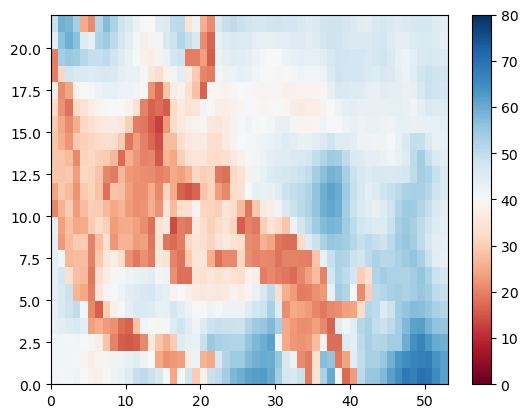

In [207]:
plt.pcolor(DS_mjocnn[3][4,2,85:107,80:133],cmap='RdBu',vmin=0,vmax=80)
plt.colorbar()

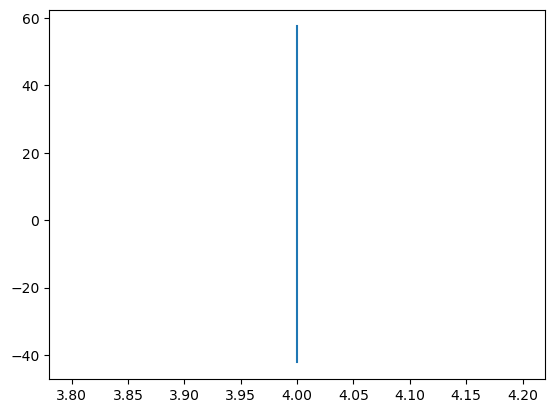

In [201]:
plt.plot([4,4],[np.mean(DS_mjocnn[0][6,2,85:107,80:145])+np.mean(DS_mjocnn[3][6,2,85:107,80:145]),np.mean(DS_mjocnn[0][6,2,85:107,80:145])-np.mean(DS_mjocnn[3][6,2,85:107,80:145])])

In [203]:
np.mean(DS_mjocnn[0][6,2,85:107,80:145])

7.633035915654858

In [202]:
np.mean(DS_mjocnn[3][6,2,85:107,80:145])

49.85438430511579

In [171]:
np.mean(DS_ERA5[0][7,2,85:107,80:133])

2.5859818630542564

In [172]:
DS_ERA5[0].shape

(8, 3, 192, 288)

In [173]:
DS_ERA5[1][:,0][85:107]

array([-9.89528796, -8.95287958, -8.0104712 , -7.06806283, -6.12565445,
       -5.18324607, -4.2408377 , -3.29842932, -2.35602094, -1.41361257,
       -0.47120419,  0.47120419,  1.41361257,  2.35602094,  3.29842932,
        4.2408377 ,  5.18324607,  6.12565445,  7.06806283,  8.0104712 ,
        8.95287958,  9.89528796])

In [174]:
DS_ERA5[1][:,0].shape

(192,)

In [175]:
DS_ERA5[2][0,:][80:133]

array([100.  , 101.25, 102.5 , 103.75, 105.  , 106.25, 107.5 , 108.75,
       110.  , 111.25, 112.5 , 113.75, 115.  , 116.25, 117.5 , 118.75,
       120.  , 121.25, 122.5 , 123.75, 125.  , 126.25, 127.5 , 128.75,
       130.  , 131.25, 132.5 , 133.75, 135.  , 136.25, 137.5 , 138.75,
       140.  , 141.25, 142.5 , 143.75, 145.  , 146.25, 147.5 , 148.75,
       150.  , 151.25, 152.5 , 153.75, 155.  , 156.25, 157.5 , 158.75,
       160.  , 161.25, 162.5 , 163.75, 165.  ])

## Color Map / Contour:

In [176]:
# define the colormap
cmap = plt.cm.RdYlBu_r
# extract all colors from the Reds map
cmaplist = [cmap(i) for i in range(cmap.N)]
# make the first color entry to be whhite
cmaplist[0] = cmap(1)
# make the last color entry to be most extreme--
cmaplist[cmap.N-1] = cmap(0.99)

for ii in range(120,136):
    cmaplist[ii]=[1,1,1,1]

cmap.N
# create the new map
cmap = cmap.from_list('My cmap', cmaplist, cmap.N)
clevels = np.arange(-1.0,1.05,0.05)
contlevels = np.arange(-1,1.1,0.1)
norm = mpl.colors.BoundaryNorm(clevels, cmap.N)
cmap.set_under([0.3, 0.00, 0.1, 1.0])
cmap.set_over('k')

NameError: name 'DS_era5' is not defined

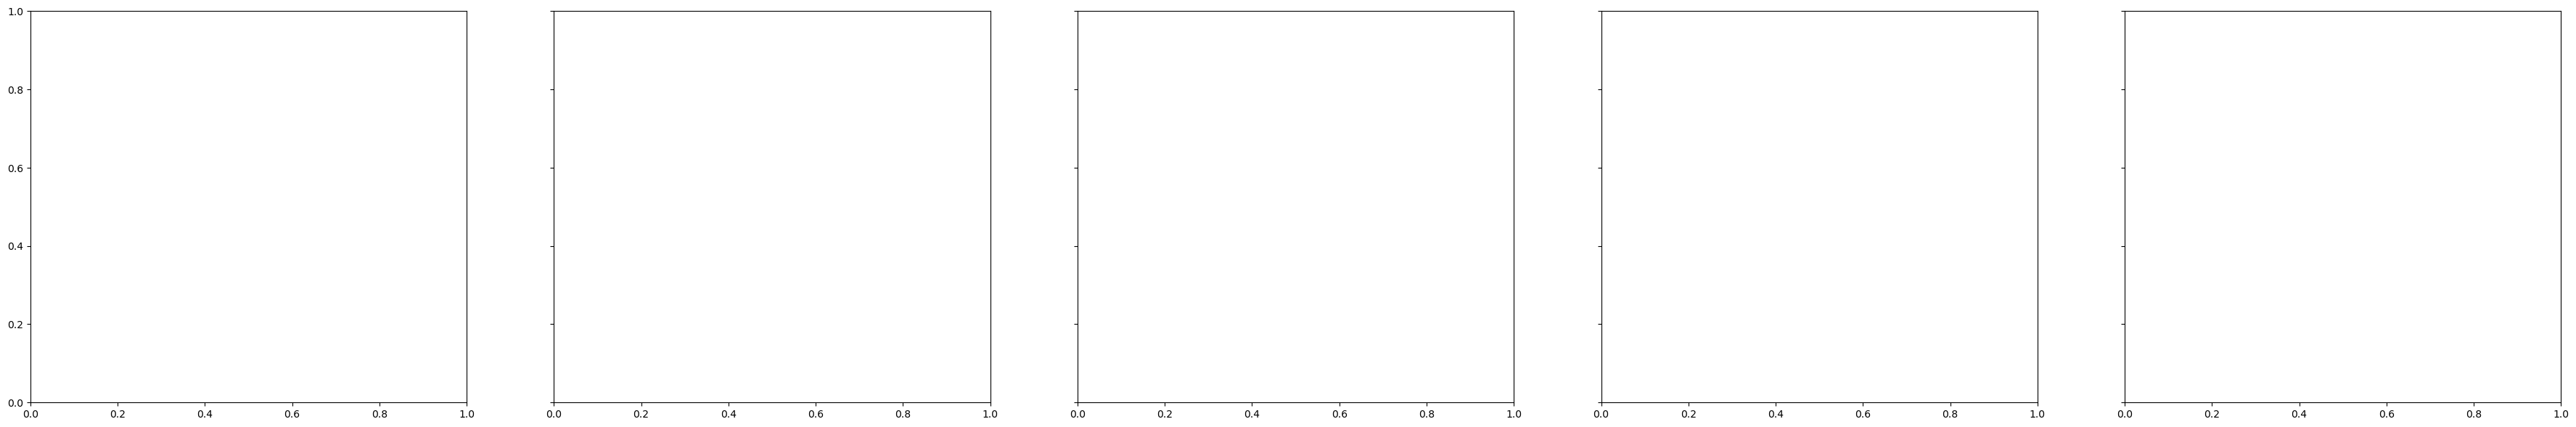

In [177]:
fig, [ax0, ax1, ax2, ax3, ax4] = plt.subplots(1, 5, sharey=True, figsize=(45,7))
bbox_props = dict(fc="white", ec="k", lw=2)

plotter = DS_era5['xcorr_P_timeLon'].T
plotterC = DS_era5['xcorr_U_timeLon'].T

# Plot for the first dataset
ff1 = ax0.contourf(DS_era5['lon'], DS_era5['lags'], plotter, levels=clevels, cmap=cmap, norm=norm, extend='both')
clr1 = ax0.contour(DS_era5['lon'], DS_era5['lags'], plotterC, levels=contlevels, colors='k', alpha=0.3)
ax0.clabel(clr1, colors='k', fontsize=12, inline=True, fmt='%1.1f')
ax0.grid(True, alpha=0.2)
ax0.set_xlabel('Longitude', fontsize=20)
ax0.set_ylabel('Lags', fontsize=20)
lon_formatter = LongitudeFormatter(number_format='.0f')
ax0.tick_params(labelsize=15) 
ax0.xaxis.set_major_formatter(lon_formatter)
ax0.set_ylim([-25,25])
ax0.text(0.98, 0.98, f'ERA5', transform=ax0.transAxes, ha='right', va='top', fontsize=20, bbox=bbox_props)
ax0.axvline(x = 90, color="black",linestyle="--",alpha=0.7)
ax0.axvline(x = 150, color="black",linestyle="--",alpha=0.7)
ax0.text(0.02, 0.02, f'a', transform=ax0.transAxes, ha='left', va='bottom', fontsize=20, bbox=bbox_props)


###########################################
plotter = DS_cntrl['xcorr_P_timeLon'].T
plotterC = DS_cntrl['xcorr_U_timeLon'].T

# Plot for the first dataset
ff1 = ax1.contourf(DS_cntrl['lon'], DS_cntrl['lags'], plotter, levels=clevels, cmap=cmap, norm=norm, extend='both')
clr1 = ax1.contour(DS_cntrl['lon'], DS_cntrl['lags'], plotterC, levels=contlevels, colors='k', alpha=0.3)
ax1.clabel(clr1, colors='k', fontsize=12, inline=True, fmt='%1.1f')
ax1.grid(True, alpha=0.2)
ax1.set_xlabel('Longitude', fontsize=20)
lon_formatter = LongitudeFormatter(number_format='.0f')
ax1.tick_params(labelsize=15) 
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.set_ylim([-25,25])
ax1.text(0.98, 0.98, f'CNTRL', transform=ax1.transAxes, ha='right', va='top', fontsize=20, bbox=bbox_props)
ax1.axvline(x = 90, color="black",linestyle="--",alpha=0.7)
ax1.axvline(x = 150, color="black",linestyle="--",alpha=0.7)
ax1.text(0.02, 0.02, f'b', transform=ax1.transAxes, ha='left', va='bottom', fontsize=20, bbox=bbox_props)


###########################################
plotter = DS_mean['xcorr_P_timeLon'].T
plotterC = DS_mean['xcorr_U_timeLon'].T

# Plot for the first dataset
ff1 = ax2.contourf(DS_mean['lon'], DS_mean['lags'], plotter, levels=clevels, cmap=cmap, norm=norm, extend='both')
clr1 = ax2.contour(DS_mean['lon'], DS_mean['lags'], plotterC, levels=contlevels, colors='k', alpha=0.3)
ax2.clabel(clr1, colors='k', fontsize=12, inline=True, fmt='%1.1f')
ax2.grid(True, alpha=0.2)
ax2.set_xlabel('Longitude', fontsize=20)
lon_formatter = LongitudeFormatter(number_format='.0f')
ax2.tick_params(labelsize=15) 
ax2.xaxis.set_major_formatter(lon_formatter)
ax2.set_ylim([-25,25])
ax2.text(0.98, 0.98, f'MITA1.0', transform=ax2.transAxes, ha='right', va='top', fontsize=20, bbox=bbox_props)
ax2.axvline(x = 90, color="black",linestyle="--",alpha=0.7)
ax2.axvline(x = 150, color="black",linestyle="--",alpha=0.7)
ax2.text(0.02, 0.02, f'c', transform=ax2.transAxes, ha='left', va='bottom', fontsize=20, bbox=bbox_props)


###########################################
plotter = DS_mjocnn['xcorr_P_timeLon'].T
plotterC = DS_mjocnn['xcorr_U_timeLon'].T

# Plot for the first dataset
ff1 = ax3.contourf(DS_mjocnn['lon'], DS_mjocnn['lags'], plotter, levels=clevels, cmap=cmap, norm=norm, extend='both')
clr1 = ax3.contour(DS_mjocnn['lon'], DS_mjocnn['lags'], plotterC, levels=contlevels, colors='k', alpha=0.3)
ax3.clabel(clr1, colors='k', fontsize=12, inline=True, fmt='%1.1f')
ax3.grid(True, alpha=0.2)
ax3.set_xlabel('Longitude', fontsize=20)
lon_formatter = LongitudeFormatter(number_format='.0f')
ax3.tick_params(labelsize=15) 
ax3.xaxis.set_major_formatter(lon_formatter)
ax3.set_ylim([-25,25])
ax3.text(0.98, 0.98, f'MITA1.0MJO1.0', transform=ax3.transAxes, ha='right', va='top', fontsize=20, bbox=bbox_props)
ax3.axvline(x = 90, color="black",linestyle="--",alpha=0.7)
ax3.axvline(x = 150, color="black",linestyle="--",alpha=0.7)
ax3.text(0.02, 0.02, f'd', transform=ax3.transAxes, ha='left', va='bottom', fontsize=20, bbox=bbox_props)


###########################################
plotter = DS_fullcnn['xcorr_P_timeLon'].T
plotterC = DS_fullcnn['xcorr_U_timeLon'].T

# Plot for the first dataset
ff1 = ax4.contourf(DS_fullcnn['lon'], DS_fullcnn['lags'], plotter, levels=clevels, cmap=cmap, norm=norm, extend='both')
clr1 = ax4.contour(DS_fullcnn['lon'], DS_fullcnn['lags'], plotterC, levels=contlevels, colors='k', alpha=0.3)
ax4.clabel(clr1, colors='k', fontsize=12, inline=True, fmt='%1.1f')
ax4.grid(True, alpha=0.2)
ax4.set_xlabel('Longitude', fontsize=20)
lon_formatter = LongitudeFormatter(number_format='.0f')
ax4.tick_params(labelsize=15) 
ax4.xaxis.set_major_formatter(lon_formatter)
ax4.set_ylim([-25,25])
ax4.text(0.98, 0.98, f'MITA1.0CNN0.3', transform=ax4.transAxes, ha='right', va='top', fontsize=20, bbox=bbox_props)
ax4.axvline(x = 90, color="black",linestyle="--",alpha=0.7)
ax4.axvline(x = 150, color="black",linestyle="--",alpha=0.7)
ax4.text(0.02, 0.02, f'e', transform=ax4.transAxes, ha='left', va='bottom', fontsize=20, bbox=bbox_props)


plt.subplots_adjust(left=0.05, right=0.85, bottom=0.1, top=0.9, wspace=0.09, hspace=0.2)

# Create a colorbar on the right side of the plot
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.2, -0.1, 0.45, 0.07])  # Adjust the colorbar position
cb = mpl.colorbar.ColorbarBase(cbar_ax, cmap=cmap, norm=norm, extend='both', spacing='proportional', ticks=clevels, boundaries=clevels, orientation='horizontal')
cbar_ax.set_xlabel('Correlation', size=20)
cb.ax.tick_params(labelsize=20)
tick_locator = ticker.MaxNLocator(nbins=10)
cb.locator = tick_locator
cb.update_ticks()
plt.savefig('./lagged_corr_all_exp_P_U850_lons.png',bbox_inches='tight',dpi=400)
plt.show()

In [ ]:
fig, [ax0, ax1, ax2, ax3, ax4] = plt.subplots(1, 5, sharey=True, figsize=(45,7))
bbox_props = dict(fc="white", ec="k", lw=2)

plotter = DS_era5['xcorr_P_timeLat'].T
plotterC = DS_era5['xcorr_U_timeLat'].T

# Plot for the first dataset
ff1 = ax0.contourf(DS_era5['lat'], DS_era5['lags'], plotter, levels=clevels, cmap=cmap, norm=norm, extend='both')
clr1 = ax0.contour(DS_era5['lat'], DS_era5['lags'], plotterC, levels=contlevels, colors='k', alpha=0.3)
ax0.clabel(clr1, colors='k', fontsize=12, inline=True, fmt='%1.1f')
ax0.grid(True, alpha=0.2)
ax0.set_xlabel('Latitude', fontsize=20)
ax0.set_ylabel('Lags', fontsize=20)
lon_formatter = LatitudeFormatter(number_format='.0f')
ax0.tick_params(labelsize=15) 
ax0.xaxis.set_major_formatter(lon_formatter)
ax0.set_ylim([-25,25])
ax0.text(0.98, 0.98, f'ERA5', transform=ax0.transAxes, ha='right', va='top', fontsize=20, bbox=bbox_props)
ax0.text(0.02, 0.02, f'a', transform=ax0.transAxes, ha='left', va='bottom', fontsize=20, bbox=bbox_props)


###########################################
plotter = DS_cntrl['xcorr_P_timeLat'].T
plotterC = DS_cntrl['xcorr_U_timeLat'].T

# Plot for the first dataset
ff1 = ax1.contourf(DS_cntrl['lat'], DS_cntrl['lags'], plotter, levels=clevels, cmap=cmap, norm=norm, extend='both')
clr1 = ax1.contour(DS_cntrl['lat'], DS_cntrl['lags'], plotterC, levels=contlevels, colors='k', alpha=0.3)
ax1.clabel(clr1, colors='k', fontsize=12, inline=True, fmt='%1.1f')
ax1.grid(True, alpha=0.2)
ax1.set_xlabel('Latitude', fontsize=20)
lon_formatter = LatitudeFormatter(number_format='.0f')
ax1.tick_params(labelsize=15) 
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.set_ylim([-25,25])
ax1.text(0.98, 0.98, f'CNTRL', transform=ax1.transAxes, ha='right', va='top', fontsize=20, bbox=bbox_props)
ax1.text(0.02, 0.02, f'b', transform=ax1.transAxes, ha='left', va='bottom', fontsize=20, bbox=bbox_props)


###########################################
plotter = DS_mean['xcorr_P_timeLat'].T
plotterC = DS_mean['xcorr_U_timeLat'].T

# Plot for the first dataset
ff1 = ax2.contourf(DS_mean['lat'], DS_mean['lags'], plotter, levels=clevels, cmap=cmap, norm=norm, extend='both')
clr1 = ax2.contour(DS_mean['lat'], DS_mean['lags'], plotterC, levels=contlevels, colors='k', alpha=0.3)
ax2.clabel(clr1, colors='k', fontsize=12, inline=True, fmt='%1.1f')
ax2.grid(True, alpha=0.2)
ax2.set_xlabel('Latitude', fontsize=20)
lon_formatter = LatitudeFormatter(number_format='.0f')
ax2.tick_params(labelsize=15) 
ax2.xaxis.set_major_formatter(lon_formatter)
ax2.set_ylim([-25,25])
ax2.text(0.98, 0.98, f'Mean', transform=ax2.transAxes, ha='right', va='top', fontsize=20, bbox=bbox_props)
ax2.text(0.02, 0.02, f'c', transform=ax2.transAxes, ha='left', va='bottom', fontsize=20, bbox=bbox_props)


###########################################
plotter = DS_mjocnn['xcorr_P_timeLat'].T
plotterC = DS_mjocnn['xcorr_U_timeLat'].T

# Plot for the first dataset
ff1 = ax3.contourf(DS_mjocnn['lat'], DS_mjocnn['lags'], plotter, levels=clevels, cmap=cmap, norm=norm, extend='both')
clr1 = ax3.contour(DS_mjocnn['lat'], DS_mjocnn['lags'], plotterC, levels=contlevels, colors='k', alpha=0.3)
ax3.clabel(clr1, colors='k', fontsize=12, inline=True, fmt='%1.1f')
ax3.grid(True, alpha=0.2)
ax3.set_xlabel('Latitude', fontsize=20)
lon_formatter = LatitudeFormatter(number_format='.0f')
ax3.tick_params(labelsize=15) 
ax3.xaxis.set_major_formatter(lon_formatter)
ax3.set_ylim([-25,25])
ax3.text(0.98, 0.98, f'mjoCNN', transform=ax3.transAxes, ha='right', va='top', fontsize=20, bbox=bbox_props)
ax3.text(0.02, 0.02, f'd', transform=ax3.transAxes, ha='left', va='bottom', fontsize=20, bbox=bbox_props)

###########################################
plotter = DS_fullcnn['xcorr_P_timeLat'].T
plotterC = DS_fullcnn['xcorr_U_timeLat'].T

# Plot for the first dataset
ff1 = ax4.contourf(DS_fullcnn['lat'], DS_fullcnn['lags'], plotter, levels=clevels, cmap=cmap, norm=norm, extend='both')
clr1 = ax4.contour(DS_fullcnn['lat'], DS_fullcnn['lags'], plotterC, levels=contlevels, colors='k', alpha=0.3)
ax4.clabel(clr1, colors='k', fontsize=12, inline=True, fmt='%1.1f')
ax4.grid(True, alpha=0.2)
ax4.set_xlabel('Latitude', fontsize=20)
lon_formatter = LatitudeFormatter(number_format='.0f')
ax4.tick_params(labelsize=15) 
ax4.xaxis.set_major_formatter(lon_formatter)
ax4.set_ylim([-25,25])
ax4.text(0.98, 0.98, f'fullCNN', transform=ax4.transAxes, ha='right', va='top', fontsize=20, bbox=bbox_props)
ax4.text(0.02, 0.02, f'e', transform=ax4.transAxes, ha='left', va='bottom', fontsize=20, bbox=bbox_props)



plt.subplots_adjust(left=0.05, right=0.85, bottom=0.1, top=0.9, wspace=0.09, hspace=0.2)

# Create a colorbar on the right side of the plot
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.2, -0.1, 0.45, 0.07])  # Adjust the colorbar position
cb = mpl.colorbar.ColorbarBase(cbar_ax, cmap=cmap, norm=norm, extend='both', spacing='proportional', ticks=clevels, boundaries=clevels, orientation='horizontal')
cbar_ax.set_xlabel('Correlation', size=20)
cb.ax.tick_params(labelsize=20)
tick_locator = ticker.MaxNLocator(nbins=10)
cb.locator = tick_locator
cb.update_ticks()
plt.savefig('./lagged_corr_all_exp_P_U850_lats.png',bbox_inches='tight',dpi=400)
plt.show()